# Q-Learning pt.2  Frozen Lake

## Winter is coming:

![](lake.png) 
Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, because you don't want to get wet you send out your robot to retrieve the frisbee. The surface is described using a grid like the following:
    
        State:        State #:
        S F F F     0  1  2  3
        F H F H     4  5  6  7 
        F F F H     8  9  10 11 
        H F F G     12 13 14 15 
        
        
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom (instant death)
    G : goal, where the frisbee is located
    
The episode ends when you reach the goal or fall in a hole.
    
You receive a reward of 1 if you reach the goal, and zero otherwise.



In [564]:
# The Frozenlake is a standard practive environtment from the Open AI Gym. 
# Gym is a toolkit for developing and comparing reinforcement learning algorithms. 
# It supports teaching agents everything from walking to playing games like Pong or Pinball.
# If you do not have this installed yet (shame, shame): https://gym.openai.com/docs/#installation 

import gym
import math
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt


### loading the environment

In [565]:
# Let's load the Frozen lake environment
# Slippery means that sometimes the robot will slip on the ice and move in a random direction 
env_4x4 = gym.make('FrozenLake-v0',map_name="4x4",is_slippery=False)

### check the environment

In [566]:
# This function shows your current location and the environment
env_4x4.render()


SFFF
FHFH
FFFH
HFFG


### Implement Q-Table learning algorithm

Ontwikkel nu een Q learning algoritme dat kan leren hoe het beste van start $S$ naar het doel $G$ te lopen, en dus de wakken de vermijden.

Details over Q-learning zijn terug te vinden in de college slides en het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6.


**Let op:** In dit experiment zijn meerdere states. Dit heeft als gevolg dat bij het leren rekening gehouden moet worden met de actie in de volgende state gemaakt wordt. We gaan hier dan vanuit dat de robot altijd de actie kiest met de hoogste Q-value. De prediction error wordt dus:

$$\delta = r_{t+1} + \gamma\ max_a\ Q(s_{t+1} , a) − Q(s_t , a_t)$$

Waarbij de Q-value update nog steeds is gedefinieerd als:

$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \delta$$

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor van het krijgen van beloningen. Voor elke actie op elk vlak van het grid geld dus:

$Q(s, LEFT)=Q(s, RIGHT)=Q(s, UP)=Q(s, DOWN)=0$


# 1.a (10 punten)

Schrijf een functie `q_learn` die als input env (*Open AI Gym* environment), alpha ($\alpha$), epsilon ($\epsilon$), gamma ($\gamma$) en episodes accepteert. 

De output van deze functie moet een table zijn met $Q$ waarden zijn voor elke state en elke actie. Er zijn 16 states en 4 acties dus in totaal 64 combinaties. Voor de diagnose van het algoritme is het ook belangrijk een lijst met totale verdiende beloningen, maar ook het hoeveelheid stappen tot het doel (per episode) als output te hebben. 

We gaan er nu van uit dat de robot de $\epsilon$-greedy keuze regel toepast, waarbij $\epsilon$ afneemt met tijd. 

Hier alvast wat code om je op weg te helpen:

```python
def q_learn(env, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000):

    # Initialize Q table with all zeros
    states = env.observation_space.n
    actions = env.action_space.n
    Q = np.zeros([states,actions])

    # Create lists to contain total rewards and steps per episode
    jList = [] #step list
    rList = [] #reward list

    # Start learning:
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        # Total rewards this episode start at 0
        rAll = 0
        # You are still not done: (d is specific to frozen lake) 
        d = False
        # Run counter reset:
        j = 0
    
        # The Q-Table learning algorithm, each episode consists of several learning runs (loops)
        while j < 100:
            j+=1
        
            # Choose an action by greedily picking from Q table
            # NOTE (a)ctions in FrozenLake are 0:left,1:down,2:right,3:up  (this is hardcoded in env.)
            # add a tiny tiny bit of noise to the Q table to arbitrate between draws (order of .0001)
            # implement the e-greedy rule
            a = # TODO
            
                 
            # Get new state and reward from environment, this can/must be done with env.step from the Gym
            # where s1 is the new state, r is the reward, and d means the end (hole or frisbee)
            s1,r,d,_ = env.step(a)
            
            # Update Q-Table with new knowledge (assume you pick a with highest value in that state)
            Q[s,a] = # TODO
            
            
            # Update total rewards
            rAll += r
            
            # If frisbee or hole (d) then end run
            # TODO
            
            
            # Update state
            s = s1
        
   
        # Update e, reducing exploration over episodes
        epsilon = epsilon*.999
        jList.append(j)
        rList.append(rAll)
    
    return (rList, jList, Q)  
```

de ingevoerde hyperparameters werken goed maar voel je vrij om hier mee te experimenteren. 


In [567]:
def q_learn(env, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000):

    # Initialize Q table with all zeros
    states = env.observation_space.n
    actions = env.action_space.n
    Q = np.zeros([states,actions])

    # Create lists to contain total rewards and steps per episode
    jList = [] #step list
    rList = [] #reward list

    # Start learning:
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        
        # Total rewards this episode start at 0
        rAll = 0
        # You are still not done: (d is specific to frozen lake) 
        d = False
        # Run counter reset:
        j = 0
    
        # The Q-Table learning algorithm, each episode consists of several learning runs (loops)
        while j < 100:
            j+=1

            # Choose an action by greedily picking from Q table
            # NOTE (a)ctions in FrozenLake are 0:left,1:down,2:right,3:up  (this is hardcoded in env.)
            # add a tiny tiny bit of noise to the Q table to arbitrate between draws (order of .0001)
            # implement the e-greedy rule
            noise = np.random.normal(0, 0.0001, 4)
            choice = random.uniform(0, 1)
            if choice < epsilon:
                a = random.randrange(0,4) 
            else:
                row = Q[s] + noise
                a = np.where(row == np.amax(row))
                a = np.random.choice(np.reshape(a, len(a[0])))
        
                 
            # Get new state and reward from environment, this can/must be done with env.step from the Gym
            # where s1 is the new state, r is the reward, and d means the end (hole or frisbee)
            s1,r,d,_ = env.step(a)

            # Update Q-Table with new knowledge (assume you pick a with highest value in that state)
            row_2 = Q[s1]
            max_s1 = np.where(row_2 == np.amax(row_2))
            max_s1 = np.random.choice(np.reshape(max_s1, len(max_s1[0])))

            delta = r + gamma*(Q[s1][max_s1]) - Q[s][a]
            Q[s][a] = Q[s][a] + alpha*delta
            
            # Update total rewards
            rAll += r
            
            # If frisbee or hole (d) then end run
            if d:
                break
                
            
            # Update state
            s = s1
        
   
        # Update e, reducing exploration over episodes
        epsilon = epsilon*.999
        jList.append(j)
        rList.append(rAll)
    
    return (rList, jList, Q)  

rlist, jlist, Q = q_learn(env_4x4, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000)


# 1.b   (10 punten) 

Laat me behulp van deze functie de robot 1000 episodes leren over deze wereld (1 leer episode bestaat dus uit 100 trials). Bereken de gemiddelde score over alle episodes. (heel soms komt dit model niet op de oplossing run het dan nog eens). 

Plot ook in bins van 10 trials (dus gemiddelde beloning per bin van 10 trials), de verandering in beloningen over tijd. Waar ligt het omslag punt? 

Plot ook in bins van 10 trails, de hoeveelheid stappen er gemaakt zijn. Hoe kort is de korste route tot succes waar het model op uitkomt? Hoe verhoud zich dit tot de werklijke korste route?

In [568]:
rlist, jlist, Q = q_learn(env_4x4, alpha=.8, gamma=.95, epsilon=.1, num_episodes=1000)

> De gemiddelde reward score over 1000 episodes was bij onze run 0.668.

> De gemiddelde stappen score over 1000 episodes was bij onze run 6.56.

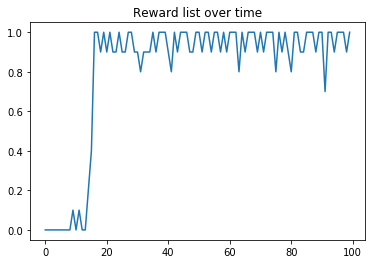

In [569]:
rlist = np.asarray(rlist)
width = 10
reward = rlist[:(rlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Reward list over time')
plt.plot(reward, label=r"$reward score$")

> Het omslagpunt ligt ongeveer rond de 200 episodes. Na 200 episodes heeft de robot geleerd hoe hij naar de frisbee moet komen.

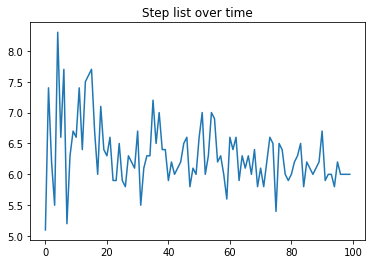

In [570]:
jlist = np.asarray(jlist)
width = 10
steps = jlist[:(jlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Step list over time')
plt.plot(steps, label=r"$step score$")

> De werkelijke kortste route tot succes is 6 stappen. In de grafiek wordt echter ook wel eens de step score van 4 gehaald. Dit is dan niet een route naar succes, maar een route naar een wak. Het model komt ook wel eens op zes stappen uit. In die gevallen heeft de robot dus de kortste route naar de frisbee gevonden.

# Q tables
# 1.c (5 punten)

Laten we nu naar de $Q$ tables gaan kijken. We kunnen zo inspecteren welk route de robot zou lopen als deze altijd max$Q$ zou kiezen (dus puur greedy, $epsilon$=0).

Gebruik nu de final $Q$ table die `learn_q()` aan het eind geeft. Hierbij is elke kolom de lijst van Q values voor 1 actie in alle 16 states. Dus `output[2][:,0]` geeft je de meest linker kolom en dat zijn de Q values voor actie naar links bewegen. 

Zorg dat je een lijst krijgt (Qmax) met voor elke state de actie die de hoogste Q value had. Representeer hier elke actie met een getal (0=links, 1=benden, 2=rechts, 3=boven). Plot vervolgens deze lijst in een grid: 

```python
env_4x4.render()
print()

Qmax=np.asarray(Qmax).reshape((4,4))
print(Qmax)

plt.matshow(Qmax)
plt.show()
```

Hiervoor gebruiken we [matshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html), om te zorgen dat de verschillende waarde in de matrix getoond worden met verschillende kleuren. Donkere kleuren zijn hierbij lage waardes en lichte kleuren hogere waardes.

Ga nu na hoe de robot looopt, gaat deze links of rechts langs het wak linksboven op de kaart. 

  (Right)
SFFF
FHFH
FFFH
HFFG

[[1 0 0 0]
 [1 0 0 0]
 [2 1 0 0]
 [0 2 2 0]]


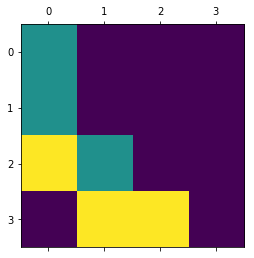

In [571]:
Qmax = []
for row in Q:
    row = row.tolist()
    Qmax.append(row.index(max(row)))

env_4x4.render()
print()

Qmax=np.asarray(Qmax).reshape((4,4))
print(Qmax)

plt.matshow(Qmax)
plt.show()

> Vanuit ons oogpunt en toen wij de code runde ging de robot rechts langs het wak en daarna rechtstreeks naar beneden.

# 2 loading the slippery environment
We kijken nu even snel naar hoe de robot zich op glad ijs gaat begeven. Nu zal hij dus af en toe gewoon een andere kant opschuiven. Laad omgeving opnieuw in nu met `is_slippery=True`

In [572]:
#let's load the Frozen lake environment
#slippery means that sometimes the robot will slip on the ice and move in a random direction 
env_slip = gym.make('FrozenLake-v0',map_name="4x4",is_slippery=True)

## 2.a (5 punten)
Run hetzelfde `q_learn` algoritme, met dezelfde parameter waardes. Laat nu ook weer de gemiddelde score zien, en ook hoe de gemiddelde beloning en het aantal stappen met de tijd verandert. Vergelijk dit met de non-slippery omgeving van hiervoor, noem de meest opvallende verschillen en leg uit waarom we die zien. 

In [606]:
rlist_slip, jlist_slip, Q_slip = q_learn(env_slip, alpha=.8, gamma=.95, epsilon=.1, num_episodes=1000)

> De gemiddelde reward score over 1000 episodes in de slippery environment was bij onze run 0.136.

> De gemiddelde stappen score over 1000 episodes in de slippery environment was bij onze run 19.71.

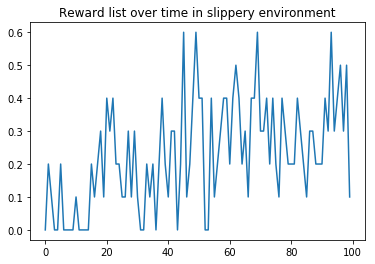

In [574]:
rlist = np.asarray(rlist_slip)
width = 10
reward = rlist[:(rlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Reward list over time in slippery environment')
plt.plot(reward, label=r"$step score$")

> Opvallend is dat de gemiddelde reward score een stuk lager ligt als in de non-slippery environment (NSE). De 
grafiek van de slippery environment (SE) daalt ook af en toe nog significant in vergelijking met de NSE. Bij de NSE heeft de robot na ongeveer 200 episodes aardig door hoe hij bij de frisbee moet komen. In de SE komt de robot er eigenlijk nooit met zekerheid achter hoe hij bij de frisbee moet komen.

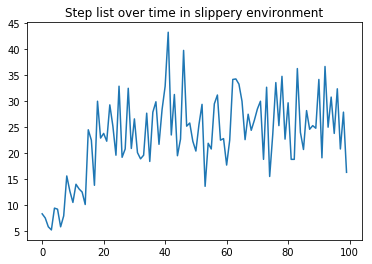

In [575]:
jlist = np.asarray(jlist_slip)
width = 10
steps = jlist[:(jlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Step list over time in slippery environment')
plt.plot(steps, label=r"$step score$")

> De step score van de SE is een heel stuk hoger als van de NSE. Dit is ook zichtbaar in de grafiek. Waar in de NSE de step score afneemt, neemt de step score alleen maar toe in de SE.

> Het verschil tussen de NSE en de SE voor beide scores komt doordat in de SE de robot nergens zeker van is. Elke stap die hij neemt komt met een risico dat hij toch in een andere state terechtkomt. Hierdoor kan de robot nooit een optimale route naar de frisbee nemen en leert de robot dus ook niet welke states hij beter kan vermijden, aangezien voorheen veilige states opeens onveilig kunnen zijn.

# 3 loading the 8x8 environment
We gaat het nu wat moeilijker maken en maken het ijsmeer wat groter. Laad nu het **niet gladde** grotere ijsmeer in:
```python
env = gym.make('FrozenLake-v0',map_name="8x8",is_slippery=False)
```

In [576]:
#let's load the Frozen lake environment
#slippery means that sometimes you slip on the ice and move in a random direction 
env_8x8 = gym.make('FrozenLake-v0',map_name="8x8",is_slippery=False)

Check even deze nieuwe omgeving: `env.render()` 

In [577]:
# this function shows your current location and the environment
env_8x8.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


## 3.a. (5 punten)
Het nieuwe meer is 8x8 maar verder helemaal hezelfde. We kunnen dan ook weer hetzelfde `q_learn()` hier op los laten. Doe dit, met weer dezelfde parameter waardes als je eerder bij de 4x4 hebt gebruikt. Rapporteer wederom hoe goed de robot het doet in termen van verkregen beloningen en aantal stappen genomen. Zie je ook een omslag punt?

In [579]:
rlist_8, jlist_8, Q_8 = q_learn(env_8x8, alpha=.8, gamma=.95, epsilon=.1, num_episodes=1000)

> De gemiddelde reward score over 1000 episodes is significant anders elke keer als de code wordt aangeroepen. Tijdens onze laatse run in de 8x8 environment was de score 0.313.

> De gemiddelde step score over 1000 episodes is significant anders elke keer als de code wordt aangeroepen. Tijdens onze laatse run in de 8x8 environment was de score 27.11.

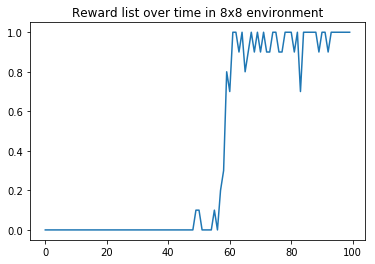

In [580]:
rlist = np.asarray(rlist_8)
width = 10
reward = rlist[:(rlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Reward list over time in 8x8 environment')
plt.plot(reward, label=r"$step score$")

> Het omslagpunt in de grafiek van de reward score verschilt significant voor elke run. De grafiek laat vaak wel een echt omslagpunt zien, wanneer dit gebeurd heeft de robot dus de optimale route naar de frisbee gevonden. Dit gebeurd meestal pas na 800 episodes. Af en toe lukt het de robot ook niet om de optimale route naar de frisbee te vinden, dit komt ook wel eens naar voren in de grafiek wanneer er dus geen duidelijk omslagpunt is. 

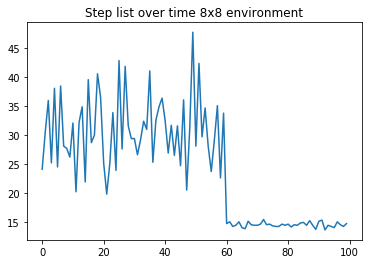

In [581]:
jlist = np.asarray(jlist_8)
width = 10
steps = jlist[:(jlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Step list over time 8x8 environment')
plt.plot(steps, label=r"$step score$")

> Ook de step score verschilt significant met elke run van de code. Vaak vindt de robot het optimale pad wel tussen de 800/900 episodes. Echter, het komt ook voor de de robot het optimale pad niet vindt. Sowieso in vergelijking met de 4x4 environment, heeft de robot veel meer episodes nodig om het optimale pad te vinden (mits de robot het vindt).

## 3.b. wereld kennis (20 punten)

In het grid van 8x8 zien we dat de robot velen trials nodig heeft om een simpele taak op te lossen. En dit is nog maar een erg simpele wereld met slechts 64 states! We gaan nu proberen of we de Q-learning robot een beetje kunnen helpen sneller te leren. Zoals we in het college gezien hebben (en zie [hier](https://arxiv.org/pdf/1802.10217.pdf)) zijn mensen heel snel in het leren van computer games omdat ze hun kennis over de wereld toepassen op de spelwereld. Laten we dat hier ook proberen en de robot wat meer kennis geven. 

Om te beginnen is het voor de robot nu niet heel duidelijk dat in een wak vallen een slecht idee is. De beloning die er bij hoort is nu nul. Het is voor mensen duidelijk dat in een wak vallen niet goed is voor het doel behalen. Zo kan je dus een kleine aanpassing maken.
Implementeer ook het volgende:

```python
 if d and r == 0:
     r = -1
```

doe dit direct na de `env.step()` stap waarbij dus net `r` is bepaald. Dit zal het model helpen sneller te leren om wakken te vermijden, door daar een negatieve reward aan te geven.  Zorg dat je deze toevoeging ook makkelijk weer aan of uit kunt zetten, zodat je het algoritme met en zonder deze toevoeging kunt testen.

Implementeer daarnaast ook nog de volgende twee toevoegingen in het `q_learn` model, die ook makkelijk aan of uit moeten kunnen voor de tests:

1.  Leer de robot dat als je in een wak loopt, je ook in dit wak loopt als je van een andere kant op het zelfde hokje loopt. Stel je loop van boven in een wak, leer dan meteen dat je ook in datzelfde wak loopt als je er van links, rechts of van onder in loopt
    * *Hint: Houd hierbij rekening met de boundaries, update geen states updaten die niet bestaan of niet in 1 stap bereikbaar zijn.*

2. Leer snel af om tegen muren aan te lopen. Nu is deze actie nog geoorloofd en brengt je weer terug op zelfde plek, met een reward van 0. Zorg dat de robot dit niet meer doet.
    * *Hint: Leer dit de robot niet af door hier ook een negatieve reward aan te geven, want dan worden de rewards onderling lastiger te vergelijken (gezien er dan meerdere negatieve rewards en 1 positieve reward in een episode kunnen zitten). In plaats daarvan zou je Q-value van de action zelf kunnen aanpassen of aanpassen hoe de action selection precies werkt.*

Beide veranderingen kunnen op verschillende manieren worden geimplementeerd. Je kan naar de Q tables kijken om te zien of jouw implementatie gewerkt heeft. 

Run de verschillende implementaties van het model, met een geen, een of een combinatie van meerdere elementen van kennis. Run elk model 20 keer voor 500 episodes en vergelijk de average rewards. Beschrijf hoe elk element wel of niet bijdraagt aan beter of sneller leren. 


In [582]:
from scipy.spatial import distance

#Losse functie voor de walls implementatie
def is_wall(env, state, a):
    if state <= 7 and a == 3:
        return True
    if state >= 54 and a == 1:
        return True
    loc = divmod(state, 8)
    left_loc = divmod(state-1, 8)
    if distance.cityblock(loc, left_loc) != 1:
        if a == 0:
            return True
    right_loc = divmod(state+1, 8)
    if distance.cityblock(loc, right_loc) != 1:
        if a == 2:
            return True
    return False

In [583]:
#Losse functie voor de Q update
def update_Q(s1, r, a, Q, gamma, alpha, s):
    row_2 = Q[s1]
    max_s1 = np.where(row_2 == np.amax(row_2))
    max_s1 = np.random.choice(np.reshape(max_s1, len(max_s1[0])))

    delta = r + gamma*(Q[s1][max_s1]) - Q[s][a]
    Q[s][a] = Q[s][a] + alpha*delta
    return Q[s][a]

In [584]:
from scipy import spatial
import numpy
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

def q_learn(env, wak=False, wak_all_side=False, walls=False, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000):

    # Initialize Q table with all zeros
    states = env.observation_space.n
    actions = env.action_space.n
    Q = np.zeros([states,actions])
    states_extra = np.arange(0, 64).reshape(8,8)
    
    # Create lists to contain total rewards and steps per episode
    jList = [] #step list
    rList = [] #reward list

    # Start learning:
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        
        # Total rewards this episode start at 0
        rAll = 0
        # You are still not done: (d is specific to frozen lake) 
        d = False
        # Run counter reset:
        j = 0
    
        # The Q-Table learning algorithm, each episode consists of several learning runs (loops)
        while j < 100:
            j+=1                    
            noise = np.random.normal(0, 0.0001, 4)
            choice = random.uniform(0, 1)
            if choice < epsilon:
                a = random.randrange(0,4) 
            else:
                row = Q[s] + noise
                a = np.where(row == np.amax(row))
                a = np.random.choice(np.reshape(a, len(a[0])))    
                 
            # Get new state and reward from environment, this can/must be done with env.step from the Gym
            # where s1 is the new state, r is the reward, and d means the end (hole or frisbee)
            s1,r,d,_ = env.step(a)
             
            if wak:
                if d and r == 0:
                    r = -1

                if wak_all_side:
                    row_s1 = np.where(states_extra==s1)[0][0]
                
                    sleft = s1-1
                    if sleft > 0:
                        row_sleft = np.where(states_extra==sleft)[0][0]
                        if row_sleft == row_s1:
                            a = 2
                            Q[sleft][a] = update_Q(s1, r, a, Q, gamma, alpha, sleft)
                    
                    sright = s1+1
                    if sright < 64:
                        row_sright = np.where(states_extra==sright)[0][0]
                        if row_sright == row_s1:
                            a = 0
                            Q[sright][a] = update_Q(s1, r, a, Q, gamma, alpha, sright)
                    
                    sup = s1-8
                    if sup >= 0:
                        a = 1
                        Q[sup][a] = update_Q(s1, r, a, Q, gamma, alpha, sup)
    
                    sdown = s1+8
                    if sdown <= 63:
                        a = 3
                        Q[sdown][a] = update_Q(s1, r, a, Q, gamma, alpha, sdown)
                else:
                    Q[s][a] = update_Q(s1, r, a, Q, gamma, alpha, s)
            
            elif wak and walls:
                if d and r == 0:
                    r = -1

                if wak_all_side:
                    row_s1 = np.where(states_extra==s1)[0][0]
                
                    sleft = s1-1
                    if sleft > 0:
                        row_sleft = np.where(states_extra==sleft)[0][0]
                        if row_sleft == row_s1:
                            a = 2
                            Q[sleft][a] = update_Q(s1, r, a, Q, gamma, alpha, sleft)
                    
                    sright = s1+1
                    if sright < 64:
                        row_sright = np.where(states_extra==sright)[0][0]
                        if row_sright == row_s1:
                            a = 0
                            Q[sright][a] = update_Q(s1, r, a, Q, gamma, alpha, sright)
                    
                    sup = s1-8
                    if sup >= 0:
                        a = 1
                        Q[sup][a] = update_Q(s1, r, a, Q, gamma, alpha, sup)
    
                    sdown = s1+8
                    if sdown <= 63:
                        a = 3
                        Q[sdown][a] = update_Q(s1, r, a, Q, gamma, alpha, sdown)
                else:
                    if is_wall(env, s, a):
                        Q[s][a] = - float('inf')
                    else:
                        Q[s][a] = update_Q(s1, r, a, Q, gamma, alpha, s)
                    
            elif walls:
                if is_wall(env, s, a):
                    Q[s][a] = - float('inf')
            else:
                Q[s][a] = update_Q(s1, r, a, Q, gamma, alpha, s)
            
            # Update total rewards
            rAll += r
            
            # If frisbee or hole (d) then end run
            if d:
                break
                      
            # Update state
            s = s1
        
        # Update e, reducing exploration over episodes
        epsilon = epsilon*.999
        jList.append(j)
        rList.append(rAll)
    
    return(rList, jList, Q)

#print(q_learn(env_8x8, True, True, False, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500))

In [585]:
import statistics

#Functie die de gemiddelde reward en step scores van 20 runs berekent.
def average_20(env_8x8, wak, wak_all_side, walls, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500):
    average_r_list = []
    average_j_list = []
    for i in range(20):
        rlist, jlist, Q = q_learn(env_8x8, wak, wak_all_side, walls, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500)
        
        average_r = np.mean(rlist)
        average_r_list.append(average_r)
        
        average_j = np.mean(jlist)
        average_j_list.append(average_j)
   
    return statistics.mean(average_r_list), statistics.mean(average_j_list)


In [586]:
#Print verschillende combinaties van de implementaties.
# print(average_20(env_8x8, True, False, False, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500))
# print(average_20(env_8x8, True, True, False, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500))
# print(average_20(env_8x8, False, False, True, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500))
# print(average_20(env_8x8, True, False, True, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500))
# print(average_20(env_8x8, True, True, True, alpha=.8, gamma=.95, epsilon=.1, num_episodes=500))


> Voor de combinatie met alleen als extra implementatie een punishment voor in het wak vallen is de gemiddelde reward score 0.2714 en de gemiddelde step score 32.5528

> Voor de combinatie van wak en wak_all_side is de gemiddelde reward score -0.4446 en de gemiddelde step score = 67.7923

> Voor alleen de walls implementatie is de gemiddelde reward score 0.0011 en de gemiddelde step score 25.7692

> Voor de combinatie van wak en walls is de gemiddelde reward score 0.2728 en de gemiddelde step score = 31.2838

> Voor de combinatie van wak, wak_all_side en walls is de gemiddelde reward score -0.2016 en de gemiddelde step score = 57.614

## 3.c. (10 punten)
Verzin zelf nog een ingreep die het model beter kan laten leren, denk dan vooral na over hoe mensen die spel zouden spelen (common sense). Laat zien hoe veel beter jou model werkt (de beste implementaties zullen we bespreken in het college). 

Heuristics? Hemelsbreed afstand? Met twijfel naar recht of beneden.

# Q Networks

We hebben nu nog gewerkt met een kleine wereld met maar maximaal 64 states. De echte wereld, en veel leuke spelletjes, hebben natuurlijk een veel grotere state space, en dan wordt het al snel erg lastig om nog een Q table te gaan bijhouden. Dit is waar Q netwerken heel handig zijn, en dan met name Deep Q Networks (DQN). Een deep neural network kan helpen de state space een stuk beter generaliseerbaar te maken, en vergelijkbare Q-values toekennen aan states die veel op elkaar lijken, wat een hele waardevolle eigenschap blijkt (zie bijv. de oorspronkelijke DQN paper over Atari games leren spelen [hier](https://arxiv.org/pdf/1312.5602v1.pdf)).

In deze opdracht gaan we nu geen deep Q netwerk in elkaar zetten maar wel een simpel 1-layer Q netwerk, om te leren hoe deze werken en hoe het Q learning algoritme kan worden geïmplementeerd in een netwerk. We maken hier wel gebruik van [TensorFlow](https://www.tensorflow.org/overview/), een library waarmee je eenvoudig (deep) neural networks kan definiëren en trainen. Deze library is zeer geschikt voor DQN, en dus ook weer de frozenlake omgeving: 

In [587]:
# If the ImportError bells of shame are ringing once again:
# https://www.tensorflow.org/install/pip

import tensorflow as tf

We gaan een simpel Q netwerk opzetten waarbij er voor elke state (16) een node is in de input laag, en voor elke actie (4) een node in the output laag. Het doel is om de gewichten (weights) van het netwerk zo te trainen dat geven een state als input, de 4 outputs corresponderen met de Q-values van de 4 verschillende acties voor die state. Vervolgens kunnen gewoon een *argmax* gebruiken om de actie met met hoogste Q-value te selecteren. 

Er zijn 16 input nodes, waarbij elke state nu representeerd kan worden met een [one-hot encoding](https://en.wikipedia.org/wiki/One-hot), dus door alleen de input node van die state op 1 te zetten en alle andere input nodes op 0.

De `Qout` laag is gedefineerd als de matrix vermenigvuldiging van inputs en weights, dus simpelweg de som van de inputs vermenigvuldig met de weights voor elke output (deze manier om een neural network te definiëren zou je bekend moeten voorkomen uit **Leren**). Er is hier dus *geen* activatiefunctie (zoals bijv. Sigmoid of ReLU), i.e. dit is een netwerk met alleen een lineaire layer.

We gebruiken hier de Sum Squared Error tussen de berekende Q-values en de eigenlijke Q-values van een state, als de loss functie om het netwerk te trainen en dit is dus ook de functie die geminimaliseerd wordt tijdens het trainen.

In [588]:
tf.reset_default_graph()
states = env_4x4.observation_space.n
actions = env_4x4.action_space.n

# These lines establish the feed-forward part of the network used to choose actions
# A placeholder (tf.placeholder) is simply a variable that we will assign data to at a later date. 
# It allows us to create our operations and build our computation graph, without needing the data. 
# In TensorFlow terminology, we then feed data into the graph through these placeholders.
inputs1 = tf.placeholder(shape=[1,states],dtype=tf.float32)
# Setting the weights to random value
W = tf.Variable(tf.random_uniform([states,actions],0,0.01))

Qout = tf.matmul(inputs1,W) # we determine the Q values for each action by multiplying inputs by weights
predict = tf.argmax(Qout,1) # "predicted" action is action with highest Qout (just like Q-learn above)

# Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout)) # we proberen de 
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
updateModel = trainer.minimize(loss)


Nu wordt het tijd om het netwerk te gaan trainen. Hiervoor schrijven we de functie ` q_network `. We helpen je hier een heel stuk op weg. Loop stap voor stap de code door om te kijken of je elke stap begrijpt en vergelijk deze met de stappen van het standaard `q_learn()` algoritme dat je hierboven hebt gebruikt. 

In [589]:
def q_network(env, num_episodes=250, num_rounds=99):
    init = tf.initialize_all_variables()
    # Set learning parameters
    y = .97
    e = .3

    # Create lists to contain total rewards and steps per episode
    jList = []
    rList = []
    aList = [] # list of actions
    maxQnext = [] # list of Q values next state
    
    # for replay
    memory =[]
    d_memory =[]
    
    with tf.Session() as sess:
        sess.run(init)
        W_init=(sess.run([W])) # save initial weights
        for i in range(num_episodes):
            # Reset environment and get first new observation
            s = env.reset()
            rAll = 0
            d = False
            j = 0
            
            # The Q-Network, default run it for 99 rounds per episode
            while j < num_rounds:
                j+=1
            
                # Choose an action by greedily (with e chance of random action) from the Q-network
                # output a = maxQ of current state [s] and targetQ is list of all Q values in state [s]
                a,targetQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(states)[s:s+1]})
           
                # e greedy:
                if np.random.rand(1) < e:
                    a[0] = env.action_space.sample()
                aList.append(a[0])
                
                # Get new state and reward from environment
                s1,r,d,_ = env.step(a[0])
                
                if d and r == 0: # falling in a hole will hurt 
                    r = -1   
            
                # Obtain the Q values of the next state by feeding the new state through our network, 
                # and again assuming you will choose the action with the highest Q value
                Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(states)[s1:s1+1]})
            
                # Obtain maxQ' of next state and use this to update the Q value of our chosen action.
                maxQ1 = np.max(Q1)
                maxQnext.append(maxQ1)
                # In list of targetQ values for s, update the Q value of chosen action
                targetQ[0,a[0]] = r + y*maxQ1 
                
                # Train our network using targetQ list, we try to adjust weights in order to 
                # minimize prediction error or squared error. 
                _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(states)[s:s+1],nextQ:targetQ})
                rAll += r
                s = s1
                
                if d:
                    break
            
            # Reduce chance of random action as we train the model.
            e = e*.995
            jList.append(j)
            rList.append(rAll)                
                
        Weights=(sess.run([W])) # lets save the final weigts!
    print("\nPercent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")
    return (rList, jList, aList, W_init, Weights)

![](QNET.png) 
Hier zie je een schema van hoe het netwerk er uit ziet.

# 4.a (5 punten)

Run het model voor 1 episode, en 1 ronde. Zo kan je volgen wat er na een stap gebeurd is in het netwerk. Rapporteer de initial weights nog voor de eerste stap gezet wordt, geef ook aan welke actie het model gekozen heeft voor die stap en hoe de nieuwe weights na training er uit zien. Gegeven dat er nu voor maar 1 ronde geleerd wordt, zullen de enige weights die worden aangepast, de weights uit de starting state 0 zijn, dus vergelijk alleen weights die bij deze state horen.

Geef aan hoe dit in vergelijking is met de `q_learn()`. Verwijs in je uitleg ook naar prediction errors. 


In [590]:
rList, jList, aList, W_init, Weights = q_network(env_4x4, num_episodes=1, num_rounds=1)

Instructions for updating:
Use `tf.global_variables_initializer` instead.

Percent of succesful episodes: 0.0%


In [591]:
print("De initial weights zijn:", W_init)

De initial weights zijn: [array([[5.6748879e-03, 6.6917166e-03, 4.0598977e-03, 9.4269300e-03],
       [4.0481961e-03, 9.8067271e-03, 5.3569791e-04, 1.6380715e-03],
       [6.7861388e-03, 8.6448696e-03, 2.4034237e-03, 7.6241409e-03],
       [5.2829217e-03, 1.1127436e-03, 3.5449741e-03, 7.8670271e-03],
       [1.8290007e-03, 1.5040875e-03, 3.8228165e-03, 6.3182376e-03],
       [8.6680157e-03, 6.6161025e-03, 4.6511888e-04, 5.8707222e-03],
       [8.5440287e-03, 8.2904240e-03, 6.6667735e-03, 7.6821563e-04],
       [1.0025490e-03, 5.0557316e-03, 7.5768922e-03, 4.8271548e-03],
       [1.1751520e-03, 8.5967775e-05, 1.7568278e-03, 3.4528314e-03],
       [7.9789264e-03, 4.0971241e-03, 4.0513203e-03, 7.2907219e-03],
       [3.6464212e-04, 5.1593779e-05, 2.8552127e-03, 5.0488506e-03],
       [1.0396838e-04, 4.1838610e-03, 2.6279176e-03, 3.8527251e-05],
       [4.1454220e-03, 3.3853685e-03, 1.8545353e-03, 8.9114094e-03],
       [8.0165183e-03, 3.0976867e-03, 3.6931133e-03, 4.2429231e-03],
       [

> De initial weights zijn random gekozen uit een normaal verdeling.

In [605]:
# print("De weights van state 0 na 1 ronde zijn:", Weights[0][0])
# print("De initial weights van state 0 zijn:", W_init[0][0])

> De weights van state 0 na 1 ronde waren in onze run: (0.00299584 0.00966481 0.00544375 0.00147041).

> De initial weights van state 0 waren in onze run: (0.00299584 0.00981934 0.00544375 0.00147041).

>De weights in Q networks zijn vergelijkbaar met de Q-values in q_learn(). De initial weights zijn vergelijkbaar met de Q values in q_learn() na het toevoegen van noise. In q_learn() wordt de noise namelijk ook random uit een normaal verdeling gekozen. 

> De enige weight die na 1 ronde veranderd is, is de weight op de tweede positie. Deze weight is iets lager geworden. Dit is vergelijkbaar met q_learn() waar ook na 1 trial 1 q_value is aangepast voor state 0. De q values en de weights worden dan dus ook beide geupdate op basis van de prediction error.


# 4.b (5 punten)

Run nu nogmaals het netwerk maar nu met 500 episodes en 99 rounds per episode. Laat net als bij `q_learn` nu zien hoe goed het netwerk is over tijd (rewards & number of steps). Maar laat nu ook zien wat de weights/Q-values zijn voor de vier mogelijke acties in het hokje links naast de frisbee (state 14). Heeft de beste actie ook de hoogste waarde?

Gegeven dat states in dit model gepresenteerd worden met een one-hot encoding, en dat het model alleen uit 1 lineaire laag bestaat, worden de Q-values in dit simpele model nog op een vrij directe manier geleerd. Wat is hier dus de relatie tussen de weight matrix en Q-table?


In [602]:
rList, jList, aList, W_init, Weights = q_network(env_4x4, num_episodes=500, num_rounds=99)

Instructions for updating:
Use `tf.global_variables_initializer` instead.

Percent of succesful episodes: 0.7%


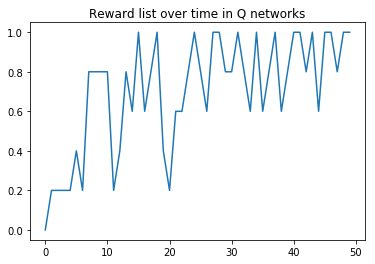

In [603]:
rlist = np.asarray(rList)
width = 10
reward = rlist[:(rlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Reward list over time in Q networks')
plt.plot(reward, label=r"$reward score$")

> Het model leert goed en snel. De grafiek stijgt al erg snel exponentieel en de gemiddelde reward score was bij onze laatste run 0.47.

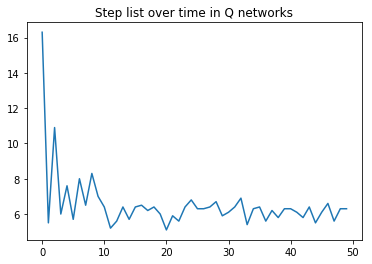

In [604]:
jlist = np.asarray(jList)
width = 10
reward = jlist[:(jlist.size // width * width)].reshape(-1, width).mean(axis=1)
plt.title('Step list over time in Q networks')
plt.plot(reward, label=r"$step score$")

> Ook de step score grafiek laat zijn dat het model goed leert. Al snel daalt de step score significant en heeft het model dus de optimale route gevonden. De gemiddelde step score was bij onze laatste run 8.948.

In [597]:
#print("Weights voor state 14:", Weights[0][14])

> De weights voor state 14 tijdens onze laatste run waren: (0.55786663, 0.4645611,  1.0074522,  0.10138178). De beste actie zou zijn om naar rechts te gaan. De weights laten ook zien dat dat de beste actie is, aangezien de weight van de actie naar rechts de hoogste waarde heeft van de vier weights.

> De relatie tussen de weight matrix en Q-table is dat ze beide simpel worden geleerd en alleen worden geupdate op basis van de state waar de robot op dat moment is.

# 4.c Experience Replay (20 punten)

Over de tijd zijn de Q_networks op vele manier uitgebreid om nog beter te kunnen leren. Een ding wat we al genoemd hadden was bijvoorbeeld het toevoegen van meerdere lagen. Maar zo is er ook het idee van experience replay, iets wat gebaseerd is op hoe de hersens werken. Wat dit inhoud is dat de robot tussen leer episodes door in zijn geheugen graaft en kijkt wat hij hiervoor gedaan heeft en wat de uitkomst daar van was. Deze herinneringen worden dan weer gebruikt om van te leren (alsof elke herinnering weer een echte gebeurtenis was). Experience replay wordt veel gebruikt in reinforcement learning, de DQN Atari paper gelinked in de section *Q networks* maakt hier bijvoorbeeld ook gebruik van.

Wat we hier gaan doen is experience replay toevoegen aan het Q_netwerk. Je hebt hier eigenlijk maar een ding voor nodig; een memory buffer (`memory =[]`)

In deze buffer sla voor elke episode van elke run op wat er gebeurde. De staat waar in je was, welke actie je hebt ondernomen, of je een beloning kreeg, welke staat je terecht kwam en of dit het einde van de episode was):   `memory.append((s, a[0], r, s1, d))`

Aan het eind van elke episode haal je dan een 30 keer een willekeurige herninnering boven en speelt deze weer uit alsof het echt gebeurde (dus zorgt voor een zelfde update in weights als normaal leren). Bij het begin van een nieuwe leer episode wordt de buffer weer leeggemaakt om ruimte te maken voor nieuwe evaringen. 

implementeer deze experience replay. Vergelijk de prestatie van het model met en zonder replay, door het beiden modelen op zn minst 10 keer aan te roepen en te kijken naar de verschillen in gemiddelde beloning. 

In [598]:
def q_network_replay(env, num_episodes=500, num_rounds=99):
    init = tf.initialize_all_variables()
    # Set learning parameters
    y = .97
    e = .3

    # Create lists to contain total rewards and steps per episode
    jList = []
    rList = []
    aList = [] # list of actions
    maxQnext = [] # list of Q values next state
    
    with tf.Session() as sess:
        sess.run(init)
        W_init=(sess.run([W])) # save initial weights
        for i in range(num_episodes):
            # Reset environment and get first new observation
            s = env.reset()
            rAll = 0
            d = False
            j = 0
            memory =[]
            # The Q-Network, default run it for 99 rounds per episode
            while j < num_rounds:
                j+=1
            
                # Choose an action by greedily (with e chance of random action) from the Q-network
                # output a = maxQ of current state [s] and targetQ is list of all Q values in state [s]
                a,targetQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(states)[s:s+1]})
           
                # e greedy:
                if np.random.rand(1) < e:
                    a[0] = env.action_space.sample()
                aList.append(a[0])
                
                # Get new state and reward from environment
                s1,r,d,_ = env.step(a[0])
                
                if d and r == 0: # falling in a hole will hurt 
                    r = -1   
            
                # Obtain the Q values of the next state by feeding the new state through our network, 
                # and again assuming you will choose the action with the highest Q value
                Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(states)[s1:s1+1]})
            
                # Obtain maxQ' of next state and use this to update the Q value of our chosen action.
                maxQ1 = np.max(Q1)
                maxQnext.append(maxQ1)
                # In list of targetQ values for s, update the Q value of chosen action
                targetQ[0,a[0]] = r + y*maxQ1 
                
                # Train our network using targetQ list, we try to adjust weights in order to 
                # minimize prediction error or squared error. 
                _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(states)[s:s+1],nextQ:targetQ})
                rAll += r
                
                memory.append((s, a[0], r, s1, d))
                
                s = s1
                
                if d:
                    break
                    
            #Speel opnieuw herinneringen af.
            for i in range(30):
                m = random.choice(memory)                
                a,targetQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(states)[m[0]:m[0]+1]})                
                Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(states)[m[3]:m[3]+1]})            
                maxQ1 = np.max(Q1)
                maxQnext.append(maxQ1)
                targetQ[0,m[1]] = m[2] + y*maxQ1 
                _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(states)[m[0]:m[0]+1],nextQ:targetQ})
                
            # Reduce chance of random action as we train the model.
            e = e*.995
            jList.append(j)
            rList.append(rAll)                
                
        Weights=(sess.run([W])) # lets save the final weigts!
    print("\nPercent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")
    return (rList, jList, aList, W_init, Weights)

In [599]:
#Functie die de gemiddelde reward van 10 runs van de q_network_replay functie berekent.
def average_replay(env_4x4, num_episodes=500, num_rounds=99):
    average_list = []
    for i in range(10):
        rlist, _, _, _, _ = q_network_replay(env_4x4, num_episodes=500, num_rounds=99)
        
        average = np.mean(rlist)
        average_list.append(average)
   
    return statistics.mean(average_list)

#Functie die de gemiddelde reward van 10 runs van de q_network functie berekent.
def average(env_4x4, num_episodes=500, num_rounds=99):
    average_list = []
    for i in range(10):
        rlist, _, _, _, _ = q_network(env_4x4, num_episodes=500, num_rounds=99)
        
        average = np.mean(rlist)
        average_list.append(average)
   
    return statistics.mean(average_list)


# print(average_replay(env_4x4, num_episodes=500, num_rounds=99))
# print(average(env_4x4, num_episodes=500, num_rounds=99))

> De replay code is beter dan de gewone q_network code. 

> De gemiddelde beloning van 10 keer aanroepen van q_network is: 0.5882

> De gemiddelde beloning van 10 keer aanroepen van q_network_replay is: 0.7052

# 4.d Better memories (5 punten)
We hebben nu naar replay gekeken waarbij je naar willekeurige herinneringen gaat kijken. Dit voor DQNs al een zeer goede invloed, maar het kan beter. Er zijn verschillende algoritmes bedacht waarbij niet naar willekeurige maar juist naar specifieke herinneringen werdt gekeken op het leren nog verder te optimaliseren. Bedenk en implementeer een vorm van optimalisatie van de replay functie, en test deze ook. Schrijf in je antwoord je motivatie voor je aanpassing (die is belangrijker dan het slagen er van). Moge de beste aanpassing winnen! 

> Een optimalisatie is wanneer alleen naar herinneringen worden gekeken die als volgende staat een wak hebben. Hierdoor leert het model erg goed waar alle wakken liggen en dat die vermeden moeten worden. Hierdoor wordt de Q-value van de acties die naar wakken leiden ook aangepast, waardoor deze actie minder vaak zal worden genomen. 

In [600]:
#q_network_replay functie maar dan met het leren nog verder geoptimaliseerd.
def q_network_replay_better(env, num_episodes=500, num_rounds=99):
    init = tf.initialize_all_variables()
    # Set learning parameters
    y = .97
    e = .3

    # Create lists to contain total rewards and steps per episode
    jList = []
    rList = []
    aList = [] # list of actions
    maxQnext = [] # list of Q values next state
    
    with tf.Session() as sess:
        sess.run(init)
        W_init=(sess.run([W])) # save initial weights
        for i in range(num_episodes):
            # Reset environment and get first new observation
            s = env.reset()
            rAll = 0
            d = False
            j = 0
            memory =[]
            # The Q-Network, default run it for 99 rounds per episode
            while j < num_rounds:
                j+=1
            
                # Choose an action by greedily (with e chance of random action) from the Q-network
                # output a = maxQ of current state [s] and targetQ is list of all Q values in state [s]
                a,targetQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(states)[s:s+1]})
           
                # e greedy:
                if np.random.rand(1) < e:
                    a[0] = env.action_space.sample()
                aList.append(a[0])
                
                # Get new state and reward from environment
                s1,r,d,_ = env.step(a[0])
                
                if d and r == 0: # falling in a hole will hurt 
                    r = -1   
            
                # Obtain the Q values of the next state by feeding the new state through our network, 
                # and again assuming you will choose the action with the highest Q value
                Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(states)[s1:s1+1]})
            
                # Obtain maxQ' of next state and use this to update the Q value of our chosen action.
                maxQ1 = np.max(Q1)
                maxQnext.append(maxQ1)
                # In list of targetQ values for s, update the Q value of chosen action
                targetQ[0,a[0]] = r + y*maxQ1 
                
                # Train our network using targetQ list, we try to adjust weights in order to 
                # minimize prediction error or squared error. 
                _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(states)[s:s+1],nextQ:targetQ})
                rAll += r
                
                memory.append((s, a[0], r, s1, d))
                
                s = s1
                
                if d:
                    break
                    
            #Speel opnieuw herinneringen af.    
            count = memory[0].count(True)
            for i in range(count - 1):
                m = random.choice([j for j in memory if j[4]])
                a,targetQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(states)[m[0]:m[0]+1]})
                Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(states)[m[3]:m[3]+1]})
                maxQ1 = np.max(Q1)
                maxQnext.append(maxQ1)
                targetQ[0,m[1]] = m[2] + y*maxQ1              
                _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(states)[m[0]:m[0]+1],nextQ:targetQ})
                
            # Reduce chance of random action as we train the model.
            e = e*.995
            jList.append(j)
            rList.append(rAll)                
                
        Weights=(sess.run([W])) # lets save the final weigts!
    print("\nPercent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")
    return (rList, jList, aList, W_init, Weights)


In [601]:
#Functie die de gemiddelde reward van 10 runs van de q_network_replay_better functie berekent.
def average_replay_better(env_4x4, num_episodes=500, num_rounds=99):
    average_list = []
    for i in range(10):
        rlist, _, _, _, _ = q_network_replay_better(env_4x4, num_episodes=500, num_rounds=99)
        
        average = np.mean(rlist)
        average_list.append(average)
   
    return statistics.mean(average_list)

#print(average_replay_better(env_4x4, num_episodes=500, num_rounds=99))

> De gemiddelde beloning van 10 keer aanroepen van q_network_replay_better is: 0.631. Dit is slechter dan de score van de q_network_replay functie.